# Spatial Tuning Maps

In [4]:
import pickle
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path
import numpy as np
from tqdm import tqdm

from dataloader import BaseDataset
from util import *

ROOT = Path("/work")
DATA_DIR = ROOT/Path('data/alldata/')
datalist = np.array([x for x in DATA_DIR.iterdir()])


## Representatives

### knockout

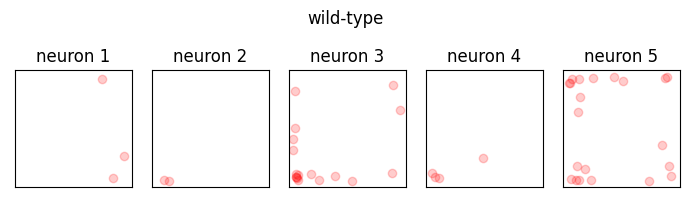

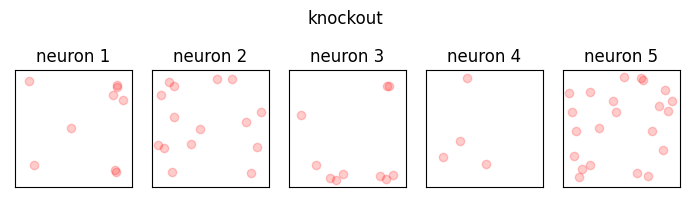

In [13]:
for data_dir in datalist[[2,1]]:
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "KO" in data_name else "wild-type"

    dataset = BaseDataset(data_dir, False, False)
    num_neuron = dataset.spikes.shape[1]

    # show 12 neurons
    fig, axes = plt.subplots(ncols=5 ,tight_layout=True, figsize=(7,2))
    axes = axes.ravel()

    # plot spikes
    for neuron_id in range(len(axes)):

        sta = cal_sta(dataset, num_par=200, neuron_id=neuron_id)
        for y, row in enumerate(sta):
            for x, spike in enumerate(row):
                if spike != 0 :
                    axes[neuron_id].scatter(x,y, c="r", alpha = .2)
        # axes[neuron_id].imshow(sta)
        axes[neuron_id].set_title(f"neuron {neuron_id+1}")
        axes[neuron_id].get_yaxis().set_visible(False)
        axes[neuron_id].get_xaxis().set_visible(False)
        axes[neuron_id].set_aspect("equal")
        axes[neuron_id].set_xlim(0,200)
        axes[neuron_id].set_ylim(0,200)

    fig.suptitle(mouse_type)

## All mice
save fig to `data/interim/data-exploration`

In [5]:
OUTPUT_DIR = ROOT/Path("data/interim/data-exploration/")
ko_count, wt_count = 0, 0
for data_dir in tqdm(datalist):
    data_name = str(data_dir).split('/')[-1]

    dataset = BaseDataset(data_dir, False, False)
    num_neuron = dataset.spikes.shape[1]

    # show all neurons
    fig, axes = plt.subplots(
        nrows = int(np.ceil((num_neuron + 1) / 5)), 
        ncols = 5, 
        figsize = (10, 2 * int(np.ceil((num_neuron+ 1 ) / 5))),
        sharex = True,
        sharey = True
        )

    if "KO" in data_name:
        mouse_type = "knockout"
        ko_count+=1
        fig.suptitle(f"{mouse_type} {ko_count}")

    else:
        mouse_type = "wild-type"
        wt_count+=1
        fig.suptitle(f"{mouse_type} {wt_count}")

    axes = axes.ravel()
    
    # plot traces
    x, y = dataset.coords_xy[:, 0], dataset.coords_xy[:, 1]
    axes[0].plot(x, y)
    axes[0].set_aspect("equal")
    axes[0].set_xlim(0,200)
    axes[0].set_ylim(0,200)
    # plot spikes
    for neuron_id in range(len(axes)-1):
        if neuron_id < num_neuron:
            sta = cal_sta(dataset, num_par=200, neuron_id=neuron_id)
            for y, row in enumerate(sta):
                for x, spike in enumerate(row):
                    if spike != 0 :
                        axes[neuron_id+1].scatter(x,y, c="r", alpha = .2)
        # axes[neuron_id].imshow(sta)
            axes[neuron_id+1].set_title(f"n {neuron_id+1}")
        axes[neuron_id+1].get_yaxis().set_visible(False)
        axes[neuron_id+1].get_xaxis().set_visible(False)
        axes[neuron_id+1].set_aspect("equal")

    if not (OUTPUT_DIR/data_name).exists():
        (OUTPUT_DIR/data_name).mkdir()
    fig.savefig(OUTPUT_DIR/data_name/"sta.png")
    fig.clf()

100%|██████████| 12/12 [07:31<00:00, 37.60s/it]


<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2400 with 0 Axes>

<Figure size 1000x2800 with 0 Axes>

<Figure size 1000x3400 with 0 Axes>

<Figure size 1000x3600 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x4800 with 0 Axes>

<Figure size 1000x2800 with 0 Axes>

<Figure size 1000x2600 with 0 Axes>

<Figure size 1000x1400 with 0 Axes>

<Figure size 1000x3200 with 0 Axes>

<Figure size 1000x2400 with 0 Axes>